# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import random
import itertools
import pickle
import torch.nn.functional as F
import torch.optim as optim
import time
from torch.utils.data import Dataset, DataLoader



# Propositional Logic

In [ ]:
def rules_to_propositional_logic(rules):
    # Mapping from attributes to propositional variables
    attribute_to_variable_map = {
        'feathers': 'F',
        'airborne': 'A',
        'aquatic': 'Q',
        'fins': 'Fn',
        'eggs': 'E',
        'milk': 'M',
        'toothed': 'T',
        'backbone': 'Bb',
        'venomous': 'V',
        'legs': 'L',
        'hair': 'H',
        'breathes': 'Br',
        'catsize': 'Cz',
        'tail': 'Ta',
        'predator': 'Pd',
        'class=Bird': 'Bi',
        'class=Fish': 'Fi',
        'class=Mammal': 'Ma',
        'class=Reptile': 'Re',
        'class=Insect': 'In',
        'class=Invertebrate': 'Iv'
    }

    print("Attribute to Variable Map:", attribute_to_variable_map)

    logic_statements = []

    for rule in rules:
        print(f"\nProcessing rule: {rule}")
         # Removing the rule number (e.g., "R2:") and splitting the condition and result.
        _, rule_body = rule.split(':')
        condition, result = rule_body.split('→')

        print(f"Condition part: {condition}, Result part: {result}")

        # Removing the parentheses from the condition part
        condition = condition.strip()[1:-1]

        condition_elements = condition.split('∧')

        # Removing any surrounding whitespace and parentheses from each condition and mapping this condition to its propositional variable.
        condition_elements = [f'¬{attribute_to_variable_map[element.split("=")[0].strip()]}' if '=0' in element else attribute_to_variable_map[element.split("=")[0].strip()] for element in condition_elements]

        # Stripping the whitespace and extracting the propositional variable for the result.
        result = result.strip()
        result_variable = attribute_to_variable_map[result]

        # Formulate the propositional logic statement
        logic_statement = f"({' ∧ '.join(condition_elements)}) → {result_variable}"
        logic_statements.append(logic_statement)

    return logic_statements

# Function to save the logic statements to a file
def save_logic_statements_to_file(file_name, logic_statements):
    with open(file_name, 'w') as file:
        for statement in logic_statements:
            file.write(f"{statement}\n")

def main():
    # Logical rules created from the Dataset
    animal_classification_rules = [
          "R1: (eggs=1 ∧ milk=0 ∧ feathers=1 ∧ airborne=1) → class=Bird",
          "R2: (eggs=1 ∧ milk=1 ∧ hair=1) → class=Mammal",
          "R3: (eggs=1 ∧ milk=0 ∧ feathers=0 ∧ aquatic=1) → class=Reptile",
          "R4: (eggs=1 ∧ backbone=1 ∧ fins=1 ∧ aquatic=1) → class=Fish",
          "R5: (hair=1 ∧ milk=1 ∧ toothed=1 ∧ backbone=1 ∧ breathes=1 ∧ catsize=1) → class=Mammal",
          "R6: (feathers=0 ∧ hair=0 ∧ eggs=1 ∧ backbone=0 ∧ legs=6 ∧ venomous=0) → class=Insect",
          "R7: (backbone=0 ∧ aquatic=1 ∧ catsize=0) → class=Invertebrate",
          "R8: (venomous=1 ∧ toothed=1 ∧ backbone=1 ∧ breathes=1 ∧ fins=0 ∧ legs=4 ∧ tail=1) → class=Reptile",
          "R9: (aquatic=1 ∧ breathes=0 ∧ backbone=1 ∧ tail=1) → class=Fish",
          "R10: (predator=1 ∧ toothed=1 ∧ backbone=1 ∧ breathes=1 ∧ venomous=0 ∧ catsize=1) → class=Mammal"
          ]

    propositional_logic = rules_to_propositional_logic(animal_classification_rules)

    for statement in propositional_logic:
        print(statement)

    # Saving the statements to a file.
    output_file = 'propositional_logic_statements.txt'
    save_logic_statements_to_file(output_file, propositional_logic)
    print(f"Propositional logic statements have been saved to {output_file}")

if __name__ == "__main__":
    main()


Attribute to Variable Map: {'feathers': 'F', 'airborne': 'A', 'aquatic': 'Q', 'fins': 'Fn', 'eggs': 'E', 'milk': 'M', 'toothed': 'T', 'backbone': 'Bb', 'venomous': 'V', 'legs': 'L', 'hair': 'H', 'breathes': 'Br', 'catsize': 'Cz', 'tail': 'Ta', 'predator': 'Pd', 'class=Bird': 'Bi', 'class=Fish': 'Fi', 'class=Mammal': 'Ma', 'class=Reptile': 'Re', 'class=Insect': 'In', 'class=Invertebrate': 'Iv'}

Processing rule: R1: (eggs=1 ∧ milk=0 ∧ feathers=1 ∧ airborne=1) → class=Bird
Condition part:  (eggs=1 ∧ milk=0 ∧ feathers=1 ∧ airborne=1) , Result part:  class=Bird

Processing rule: R2: (eggs=1 ∧ milk=1 ∧ hair=1) → class=Mammal
Condition part:  (eggs=1 ∧ milk=1 ∧ hair=1) , Result part:  class=Mammal

Processing rule: R3: (eggs=1 ∧ milk=0 ∧ feathers=0 ∧ aquatic=1) → class=Reptile
Condition part:  (eggs=1 ∧ milk=0 ∧ feathers=0 ∧ aquatic=1) , Result part:  class=Reptile

Processing rule: R4: (eggs=1 ∧ backbone=1 ∧ fins=1 ∧ aquatic=1) → class=Fish
Condition part:  (eggs=1 ∧ backbone=1 ∧ fins=1 ∧ a

In [ ]:
# Function to read and process rules from a file
def read_rules_from_file(file_path):
    unique_features = set()
    processed_rules = []

    with open(file_path, 'r') as file:
        for line in file:
            if line.strip():
                # Splitting rule and classification label
                rule_expression, class_expression = line.strip().split('→')

                # Printting the class part
                print(f"Class Expression before processing: '{class_expression}'")

                # Removing all spaces and extracting the class label
                class_label = class_expression.replace(' ', '')

                # Removing spaces from the class part and printing the class abbreviation.
                print(f"Abbreviation: '{class_label}'")

                # Processing the rule
                conditions = rule_expression.strip('()').split('∧') #Splitting the rule part into individual conditions.
                rule_dict = {}  #Initializing dictionary to store the rule's conditions
                for condition in conditions:
                    condition = condition.strip().replace(')', '') # Removing ')' from the condition
                    if '¬' in condition:
                        feature = condition.strip('¬').strip()
                        rule_dict[feature] = -1  # Negation is represented by -1
                    else:
                        feature = condition.strip()
                        rule_dict[feature] = 1
                    unique_features.add(feature)

               # Using class abbreviation as rule label
                rule_label = f"{class_label}"

                processed_rules.append((rule_dict, rule_label)) #Each processed rule, along with its label, is appended to the rules list.

    return list(unique_features), processed_rules  #Returns the list of features and the processed rules.


# Function to create a weight matrix from the rules
def generate_weight_matrix(features, processed_rules):
    matrix_data = []
    rule_labels = []
    for rule, label in processed_rules:
        rule_weights = [rule.get(feature, 0) for feature in features]
        matrix_data.append(rule_weights)
        rule_labels.append(label)
    return pd.DataFrame(matrix_data, columns=features, index=rule_labels)


# Calculating the bias for each rule
def rule_bias_calculation(rule):
    flag=0
    for weight in rule.values():
      if(weight>0):
        flag = 1
    positive_weight = flag
    return -positive_weight


# Function for creating a bias matrix from the rules
def generate_bias_matrix(processed_rules):
    biases = [rule_bias_calculation(rule) for rule, _ in processed_rules]
    return pd.DataFrame(biases, index=[label for _, label in processed_rules], columns=["Bias"])


# Defining the path for my rule file
rules_file_path = 'propositional_logic_statements.txt'

# Processing rules from the file
features, processed_rules = read_rules_from_file(rules_file_path)

# Generating weight matrix
weight_matrix_df = generate_weight_matrix(features, processed_rules)

# Generating bias matrix
bias_matrix_df = generate_bias_matrix(processed_rules)

# Function for formatting a row with equal spacing between elements
def format_matrix_row(row):
    return ' '.join(f"{element: >3}" for element in row)

# Printing weight matrix with class labels
feature_column_labels = "  ".join(f"{feature: >2}" for feature in weight_matrix_df.columns)
print(f"    {feature_column_labels}")
for class_label, row in zip(weight_matrix_df.index, weight_matrix_df.to_numpy()):
    formatted_row = format_matrix_row(row)
    print(f"{class_label}: [{formatted_row}]")

# Displaying the bias matrix
print("\nBias Matrix:")
formatted_bias_row = format_matrix_row(bias_matrix_df['Bias'].to_numpy())
print(f": [{formatted_bias_row}]")


Class Expression before processing: ' Bi'
Abbreviation: 'Bi'
Class Expression before processing: ' Ma'
Abbreviation: 'Ma'
Class Expression before processing: ' Re'
Abbreviation: 'Re'
Class Expression before processing: ' Fi'
Abbreviation: 'Fi'
Class Expression before processing: ' Ma'
Abbreviation: 'Ma'
Class Expression before processing: ' In'
Abbreviation: 'In'
Class Expression before processing: ' Iv'
Abbreviation: 'Iv'
Class Expression before processing: ' Re'
Abbreviation: 'Re'
Class Expression before processing: ' Fi'
Abbreviation: 'Fi'
Class Expression before processing: ' Ma'
Abbreviation: 'Ma'
     Q   V  Bb   A  Fn  Br   H   L  Ta   F   T   M  Cz   E  Pd
Bi: [  0   0   0   1   0   0   0   0   0   1   0  -1   0   1   0]
Ma: [  0   0   0   0   0   0   1   0   0   0   0   1   0   1   0]
Re: [  1   0   0   0   0   0   0   0   0  -1   0  -1   0   1   0]
Fi: [  1   0   1   0   1   0   0   0   0   0   0   0   0   1   0]
Ma: [  0   0   1   0   0   1   1   0   0   0   1   1   1   0   

In [ ]:
weight_matrix_df

,Q,V,Bb,A,Fn,Br,H,L,Ta,F,T,M,Cz,E,Pd
Bi,0,0,0,1,0,0,0,0,0,1,0,-1,0,1,0
Ma,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
Re,1,0,0,0,0,0,0,0,0,-1,0,-1,0,1,0
Fi,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0
Ma,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0
In,0,-1,-1,0,0,0,-1,1,0,-1,0,0,0,1,0
Iv,1,0,-1,0,0,0,0,0,0,0,0,0,-1,0,0
Re,0,1,1,0,-1,1,0,1,1,0,1,0,0,0,0
Fi,1,0,1,0,0,-1,0,0,1,0,0,0,0,0,0
Ma,0,-1,1,0,0,1,0,0,0,0,1,0,1,0,1


In [ ]:
bias_mat_final = torch.tensor(bias_matrix_df.T.values[0], dtype=torch.float32, requires_grad=False)
weight_mat_final = torch.tensor(weight_matrix_df.values, dtype=torch.float32, requires_grad=False)

# Training Data

In [ ]:
# creating a dataframe from the dataset
zoo_dataframe = pd.read_csv("/content/zoo.csv")

In [ ]:
zoo_dataframe

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


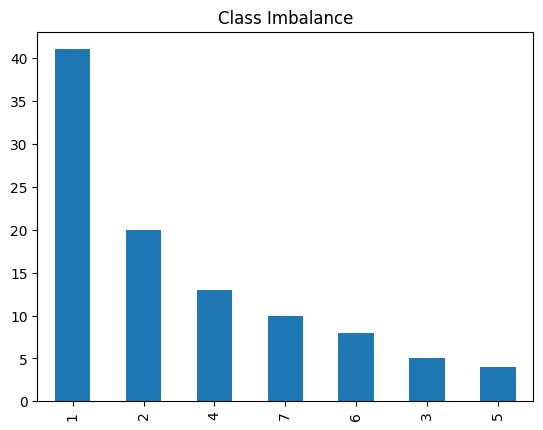

In [ ]:
# Class imbalance
ax = zoo_dataframe['class_type'].value_counts().plot(kind='bar', title='Class Imbalance')

In [ ]:
# The below balances the dataset
# It addresses class imbalance by upsampling the instances of less populous classes to match the most populous class count, thus equalizing the representation of each class.
# This can improve model performance as it prevents the model from being biased towards the majority class.

from sklearn.utils import resample

# Balancing the dataset
class_counts = zoo_dataframe['class_type'].value_counts()
max_class_count = max(class_counts)

zoo_dataframe_balanced = pd.DataFrame()
for class_value in class_counts.index:
    class_subset = zoo_dataframe[zoo_dataframe['class_type'] == class_value]
    resampled_subset = resample(class_subset, replace=True, n_samples=max_class_count, random_state=42)
    zoo_dataframe_balanced = pd.concat([zoo_dataframe_balanced, resampled_subset])

# Shuffling the balanced zoo_dataframe
zoo_dataframe_balanced = zoo_dataframe


(-1.099999949427253, 1.099999997591774, -1.1852555234519968, 1.104051222918315)

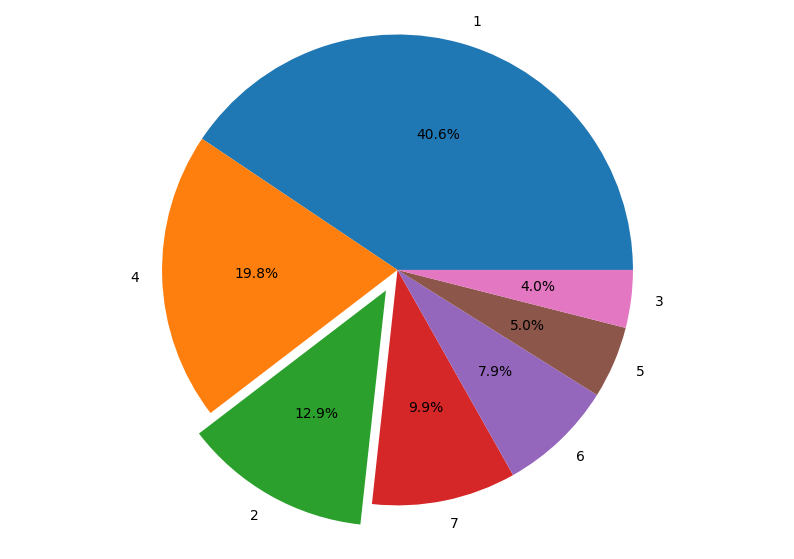

In [ ]:
# Visualizing pie chart for class_type column
labels = zoo_dataframe['class_type'].unique()
sizes = zoo_dataframe['class_type'].value_counts()
explode = (0,0,0.1,0,0,0,0)
fig1, ax1 = plt.subplots(figsize=(10, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')

In [ ]:
# Defining the function to apply the rules
def apply_rules(row):
    # Applying rules based on the feature values
    if row['eggs'] == 1 and row['milk'] == 0 and row['feathers'] == 1 and row['airborne'] == 1:
        return 2  # Bird
    elif row['eggs'] == 1 and row['milk'] == 1 and row['hair'] == 1:
        return 1  # Mammal
    elif row['eggs'] == 1 and row['milk'] == 0 and row['feathers'] == 0 and row['aquatic'] == 1:
        return 3  # Reptile
    elif row['eggs'] == 1 and row['backbone'] == 1 and row['fins'] == 1 and row['aquatic'] == 1:
        return 4  # Fish
    elif row['hair'] == 1 and row['milk'] == 1 and row['toothed'] == 1 and row['backbone'] == 1 and row['breathes'] == 1 and row['catsize'] == 1:
        return 1  # Mammal
    elif row['feathers'] == 0 and row['hair'] == 0 and row['eggs'] == 1 and row['backbone'] == 0 and row['legs'] == 6 and row['venomous'] == 0:
        return 6  # Insect
    elif row['backbone'] == 0 and row['aquatic'] == 1 and row['catsize'] == 0:
        return 7  # Invertebrate
    elif row['venomous'] == 1 and row['toothed'] == 1 and row['backbone'] == 1 and row['breathes'] == 1 and row['fins'] == 0 and row['legs'] == 4 and row['tail'] == 1:
        return 3  # Reptile
    elif row['aquatic'] == 1 and row['breathes'] == 0 and row['backbone'] == 1 and row['tail'] == 1:
        return 4  # Fish
    elif row['predator'] == 1 and row['toothed'] == 1 and row['backbone'] == 1 and row['breathes'] == 1 and row['venomous'] == 0 and row['catsize'] == 1:
        return 1  # Mammal
    else:
        return None  # Undefined or not covered by rules

zoo_dataframe_train = zoo_dataframe[:80]

# Applying the rules to each row in the DataFrame
zoo_dataframe_train['predicted_class'] = zoo_dataframe_train.apply(apply_rules, axis=1)

# Calculating the accuracy
correct_predictions = zoo_dataframe_train[zoo_dataframe_train['class_type'] == zoo_dataframe_train['predicted_class']].shape[0]
total_predictions = zoo_dataframe_train.shape[0]
logic_accuracy = correct_predictions / total_predictions
print(f"Logic-Only Prediction Accuracy: {logic_accuracy:.2f}")


Logic-Only Prediction Accuracy: 0.56


<ipython-input-36-c023a01e2129>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zoo_dataframe_train['predicted_class'] = zoo_dataframe_train.apply(apply_rules, axis=1)


In [ ]:
# Checking for NaNs in the dataset
if zoo_dataframe.isnull().any().any():
    # Handling NaNs, e.g., by filling with the median
    zoo_dataframe.fillna(zoo_dataframe.median(), inplace=True)

<ipython-input-12-9efdc87331e9>:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  zoo_dataframe.fillna(zoo_dataframe.median(), inplace=True)


In [ ]:
# Training set
train_features = torch.tensor(np.array(zoo_dataframe.values[0:80,1:16],dtype="float32"), dtype=torch.float32, requires_grad=False)
train_labels = torch.tensor(np.array(zoo_dataframe.values[0:80,-1],dtype="float32"), dtype=torch.float32, requires_grad=False)

# Validation set
validation_features = torch.tensor(np.array(zoo_dataframe.values[81:101,1:16],dtype="float32"), dtype=torch.float32, requires_grad=False)
validation_labels = torch.tensor(np.array(zoo_dataframe.values[81:101,-1],dtype="float32"), dtype=torch.float32, requires_grad=False)

In [ ]:
train_labels.shape

torch.Size([80])

In [ ]:
train_features.shape

torch.Size([80, 15])

In [ ]:
validation_features.shape

torch.Size([20, 15])

# Full Logic Network

In [ ]:
# Full Logic Network is specifically designed to adhere strictly to pre-defined logical rules.
# The network's weights and biases are set in a way that directly reflects these rules, embedding logical reasoning into the network's structure from the outset.
class FullLogicNetwork(nn.Module):
    def __init__(self):
        super(FullLogicNetwork, self).__init__()
        self.fc1 = nn.Linear(15, 10)

    def forward(self, x):
        self.fc1.weight = nn.Parameter(weight_mat_final)
        self.fc1.bias = nn.Parameter(bias_mat_final)
        x = torch.relu(self.fc1(x))

        return x

In [ ]:
# Initializing the network
net = FullLogicNetwork()

In [ ]:
predicted_output = net(train_features)

In [ ]:
predicted_output

tensor([[ 1.,  0.,  0.,  0.,  4.,  0.,  0.,  1.,  1.,  3.],
        [ 2.,  0.,  0.,  1.,  3.,  0.,  0.,  1.,  1.,  3.],
        [ 0.,  2.,  0.,  1.,  3.,  0.,  0.,  3.,  0.,  1.],
        [ 1.,  0.,  0.,  0.,  4.,  0.,  0.,  1.,  1.,  3.],
        [ 2.,  1.,  0.,  1.,  4.,  0.,  0.,  1.,  1.,  3.],
        [ 2.,  0.,  0.,  1.,  3.,  0.,  0.,  1.,  1.,  3.],
        [ 2.,  0.,  0.,  1.,  3.,  0.,  0.,  1.,  1.,  4.],
        [ 0.,  1.,  0.,  1.,  2.,  0.,  0.,  3.,  0.,  2.],
        [ 0.,  2.,  0.,  1.,  3.,  0.,  0.,  3.,  0.,  1.],
        [ 1.,  0.,  0.,  0.,  3.,  0.,  0.,  1.,  1.,  4.],
        [ 2.,  1.,  0.,  1.,  4.,  0.,  0.,  1.,  1.,  3.],
        [ 1.,  0.,  0.,  2.,  2.,  0.,  0.,  1.,  1.,  2.],
        [ 0.,  2.,  0.,  1.,  3.,  0.,  0.,  3.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  6.,  0.,  0.,  1.,  0.,  5.],
        [ 0.,  0.,  0.,  0.,  8.,  0.,  0.,  1.,  0.,  7.],
        [ 1.,  1.,  0.,  2.,  3.,  0.,  

In [ ]:
train_tensor_labels = torch.mean(predicted_output, dim=1)
train_rounded_labels = torch.round(train_tensor_labels)

In [ ]:
train_rounded_labels.shape

torch.Size([80])

In [ ]:
train_rounded_labels

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 2., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 2., 2., 2.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
        2., 1., 0., 1., 1., 1., 1., 1.], grad_fn=<RoundBackward0>)

In [ ]:
train_labels.shape

torch.Size([80])

In [ ]:
from sklearn.metrics import accuracy_score

# train_labels and train_rounded_labels are true labels and predicted labels respectively
accuracy = accuracy_score(train_labels.detach().numpy(), train_rounded_labels.detach().numpy())
print(f"The Accuracy of Full Logic Network is: {accuracy}")

The Accuracy of Full Logic Network is: 0.4


# Partial Logic Network

In [ ]:
# Layering with ReLU activation for complex feature handling.
# Using MSE and L1 loss for accuracy and to prevent overfitting.

class PartialLogicNetwork(nn.Module):
    def __init__(self):
        super(PartialLogicNetwork, self).__init__()
        self.fc1 = nn.Linear(15, 10)
        self.fc2 = nn.Linear(10, 8)
    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Applying ReLU activation function to the first layer
        x = torch.relu(self.fc2(x))  # Applying ReLU activation function to the second layer
        return x

In [ ]:
net = PartialLogicNetwork()

In [ ]:
weight_mask = nn.Parameter(weight_mat_final)
bias_mask = nn.Parameter(bias_mat_final)

In [ ]:
net.fc1.weight.data = (1 - weight_mask) * net.fc1.weight.data + weight_mask * weight_mat_final
net.fc1.bias.data = (1 - bias_mask) * net.fc1.bias.data + bias_mask * bias_mat_final


In [ ]:
# Adjustting the size of the bias tensors that were masked
net.fc1.bias.data = net.fc1.bias.data.squeeze()

In [ ]:
learning_rate = 0.05
optimizer = optim.SGD(net.parameters(),lr = learning_rate, momentum=0.2)
output_loss_metric = nn.MSELoss()
logic_loss_metric = nn.L1Loss()

In [ ]:
num_epochs = 150

# Initializing lists to store losses
training_output_loss_list = []
training_logic_loss_list = []
training_total_loss_list = []
training_accuracy_list = []

validation_output_loss_list = []
validation_logic_loss_list = []
validation_total_loss_list = []

alpha = 0.05
beta = (1-alpha)

start_time = time.time()

net.train()  # Setting the model to training mode

for i in range(num_epochs):
    # Training phase
    optimizer.zero_grad()
    predicted_output_train = net.forward(train_features)

    predicted_output_train = torch.mean(predicted_output_train, dim=1)
    predicted_output_train= torch.round(predicted_output_train)

    output_loss_train = output_loss_metric(predicted_output_train, train_labels)

    logic_loss_train = (
        logic_loss_metric(net.fc1.weight, weight_mat_final) +
        logic_loss_metric(net.fc1.bias, bias_mat_final)
    )

    total_loss_train = beta * output_loss_train + alpha * logic_loss_train
    predicted_labels_train_np = np.round(predicted_output_train.detach().numpy())
    train_labels_np = train_labels.numpy()
    correct_count = np.sum(predicted_labels_train_np == train_labels_np)
    total_count = np.prod(train_labels_np.shape)
    accuracy_train = accuracy_score(train_labels_np,predicted_labels_train_np)

    # Backward pass and optimization for training data
    total_loss_train.backward()
    optimizer.step()

    # Storing training losses
    training_output_loss_list.append(output_loss_train.item())
    training_logic_loss_list.append(logic_loss_train.item())
    training_total_loss_list.append(total_loss_train.item())
    training_accuracy_list.append(accuracy_train)

    # Setting the model to evaluation mode
    net.eval()
    with torch.no_grad():
        predicted_output_val = net.forward(validation_features)
        predicted_output_val = torch.mean(predicted_output_val, dim=1)
        predicted_output_val= torch.round(predicted_output_val)
        output_loss_val = output_loss_metric(predicted_output_val, validation_labels)
        logic_loss_val = (
            logic_loss_metric(net.fc1.weight, weight_mat_final) +
            logic_loss_metric(net.fc1.bias, bias_mat_final)
        )

        total_loss_val = beta * output_loss_val + alpha * logic_loss_val
        validation_output_loss_list.append(output_loss_val.item())
        validation_logic_loss_list.append(logic_loss_val.item())
        validation_total_loss_list.append(total_loss_val.item())
        if(i%50==0):
            print("Epoch number: {}, Training Loss: {:.4f}, Training Accuracy: {:.4f}, Validation Loss: {:.4f}".format( i, total_loss_train.item(), accuracy_train, total_loss_val.item(),i))

# Recording the end time
end_time = time.time()

# Calculating the elapsed time
elapsed_time = end_time - start_time

print(f"Total training time: {elapsed_time} seconds")

# Saving current model and parameters to file in current working directory
# Renaming hyperparameter combination
torch.save(net.state_dict(), 'partiallogiccurrentmodel.pth')

Epoch number: 0, Training Loss: 6.9738, Training Accuracy: 0.4500, Validation Loss: 10.2394
Epoch number: 50, Training Loss: 6.9729, Training Accuracy: 0.4500, Validation Loss: 10.2386
Epoch number: 100, Training Loss: 6.9721, Training Accuracy: 0.4500, Validation Loss: 10.2377
Total training time: 0.7325136661529541 seconds


## Hyperparameter tuning

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(epochs,train_output_losses,train_logic_losses,train_total_losses,
                 val_output_losses,val_logic_losses,val_total_losses):


    # Creating a figure for subplots
    plt.figure(figsize=(12, 6))

    # Subplot for Output Loss
    plt.subplot(1, 3, 1)
    plt.plot(train_output_losses, color='darkblue', label='Training Output Loss', linewidth=0.9)
    plt.plot(val_output_losses, color='darkred', label='Validation Output Loss', linewidth=0.9)
    plt.title('Training and Validation Output Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()


    # Subplot for Logic Loss
    plt.subplot(1, 3, 2)
    plt.plot(train_logic_losses, color='Yellow', label='Training Logic Loss', linewidth=0.7)
    plt.plot(val_logic_losses, color='darkviolet', label='Validation Logic Loss', linewidth=0.7)
    plt.title('Training and Validation Logic Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()


    # Subplot for Total Loss
    plt.subplot(1, 3, 3)
    plt.plot(train_total_losses, color='darkcyan', label='Training Total Loss', linewidth=0.9)
    plt.plot(val_total_losses, color='darkmagenta', label='Validation Total Loss', linewidth=0.9)
    plt.title('Training and Validation Total Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Displaying the figure with subplots
    plt.tight_layout()
    plt.show()


For combination - learning_rate = 0.01 and epoch = 100 and optimizer = SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 6.9713, Training Accuracy: 0.4500, Validation Loss: 10.2369
For coEpoch number: 50, Training Loss: 6.9712, Training Accuracy: 0.4500, Validation Loss: 10.2368


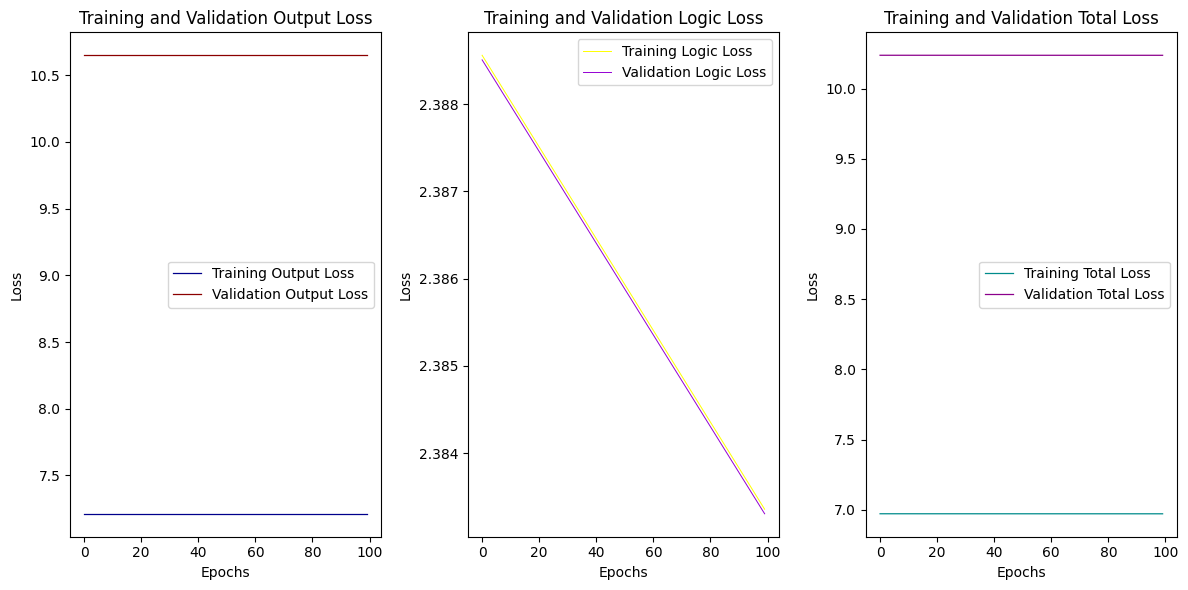

Total training time: 0.41000962257385254 seconds
For combination - learning_rate = 0.01 and epoch = 100 and optimizer = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 6.9710, Training Accuracy: 0.4500, Validation Loss: 10.2358
For coEpoch number: 50, Training Loss: 6.9518, Training Accuracy: 0.4375, Validation Loss: 11.4401


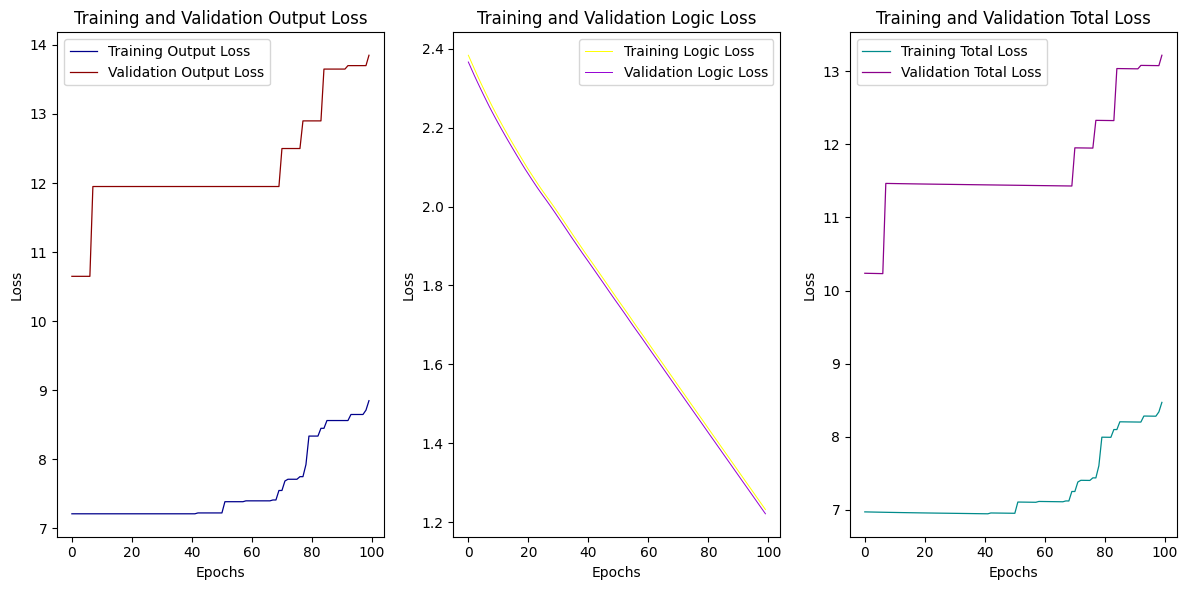

Total training time: 0.8068790435791016 seconds
For combination - learning_rate = 0.01 and epoch = 100 and optimizer = RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 8.5398, Training Accuracy: 0.2250, Validation Loss: 13.6915
For coEpoch number: 50, Training Loss: 9.2161, Training Accuracy: 0.0000, Validation Loss: 14.0139


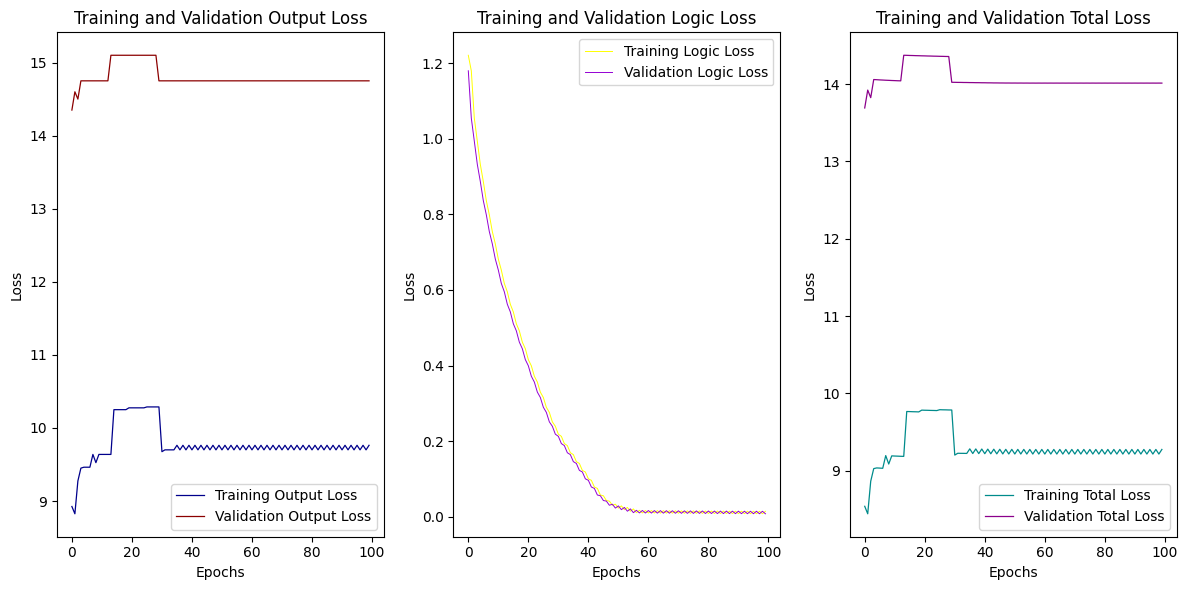

Total training time: 0.7636125087738037 seconds
For combination - learning_rate = 0.01 and epoch = 300 and optimizer = SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 9.2154, Training Accuracy: 0.0000, Validation Loss: 14.0129
For coEpoch number: 50, Training Loss: 9.2153, Training Accuracy: 0.0000, Validation Loss: 14.0128
For coEpoch number: 100, Training Loss: 9.2152, Training Accuracy: 0.0000, Validation Loss: 14.0127
For coEpoch number: 150, Training Loss: 9.2152, Training Accuracy: 0.0000, Validation Loss: 14.0127
For coEpoch number: 200, Training Loss: 9.2745, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 250, Training Loss: 9.2745, Training Accuracy: 0.0000, Validation Loss: 14.0126


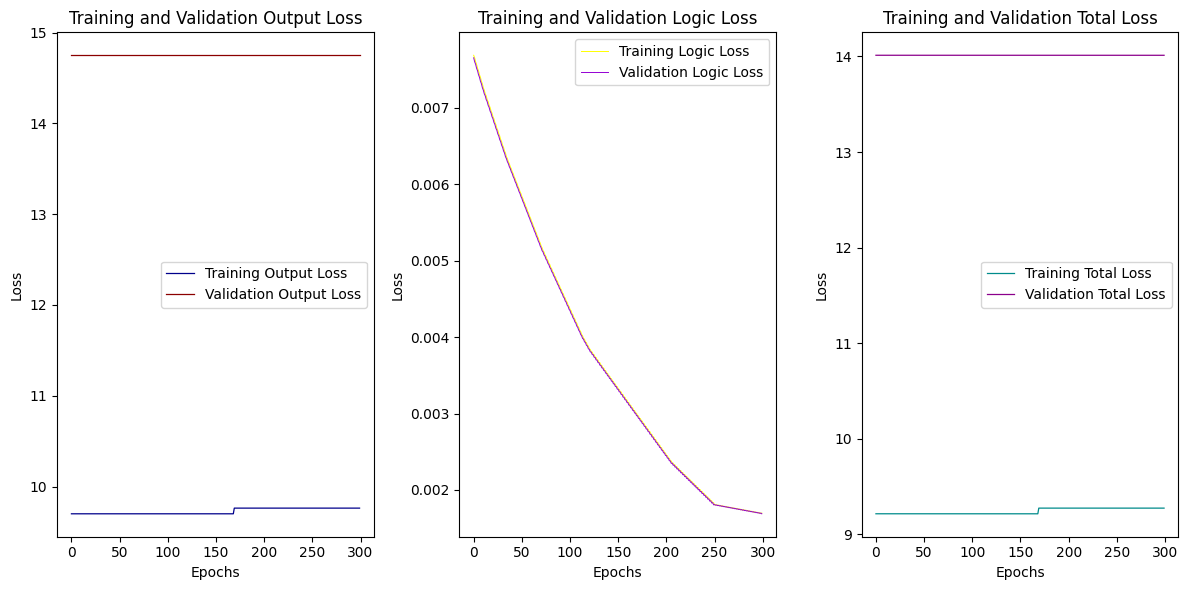

Total training time: 3.5315401554107666 seconds
For combination - learning_rate = 0.01 and epoch = 300 and optimizer = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 9.2745, Training Accuracy: 0.0000, Validation Loss: 14.0133
For coEpoch number: 50, Training Loss: 9.2745, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 100, Training Loss: 9.2745, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 150, Training Loss: 9.2745, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 200, Training Loss: 9.2745, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 250, Training Loss: 9.2151, Training Accuracy: 0.0000, Validation Loss: 14.0126


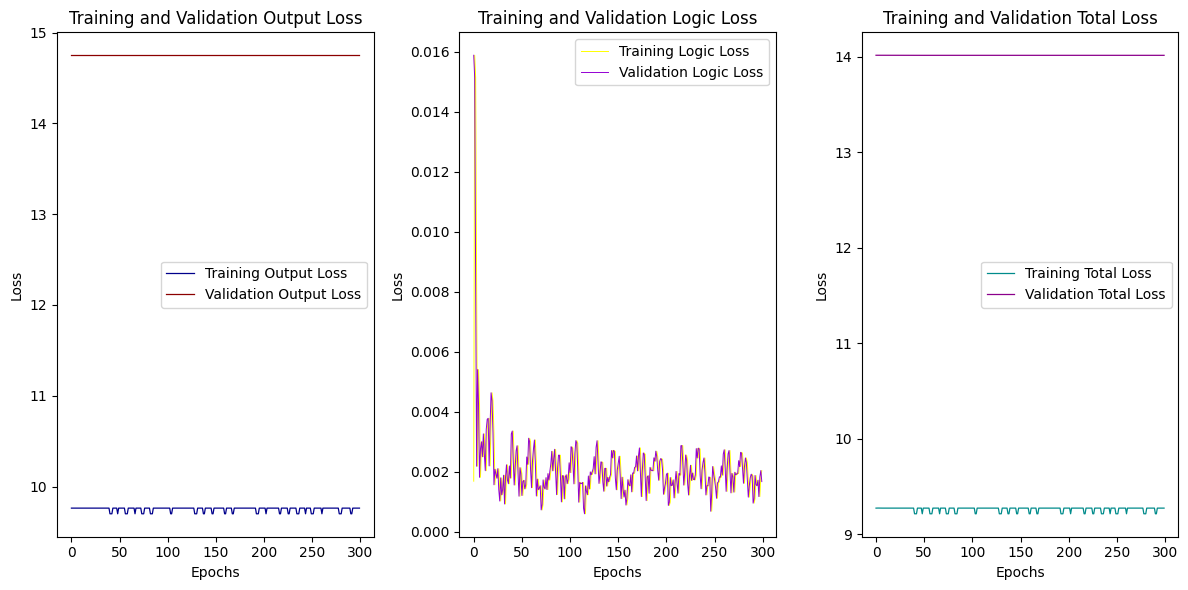

Total training time: 2.2149033546447754 seconds
For combination - learning_rate = 0.01 and epoch = 300 and optimizer = RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 9.2745, Training Accuracy: 0.0000, Validation Loss: 14.0212
For coEpoch number: 50, Training Loss: 9.2748, Training Accuracy: 0.0000, Validation Loss: 14.0135
For coEpoch number: 100, Training Loss: 9.2746, Training Accuracy: 0.0000, Validation Loss: 14.0133
For coEpoch number: 150, Training Loss: 9.2746, Training Accuracy: 0.0000, Validation Loss: 14.0133
For coEpoch number: 200, Training Loss: 9.2746, Training Accuracy: 0.0000, Validation Loss: 14.0132
For coEpoch number: 250, Training Loss: 9.2746, Training Accuracy: 0.0000, Validation Loss: 14.0132


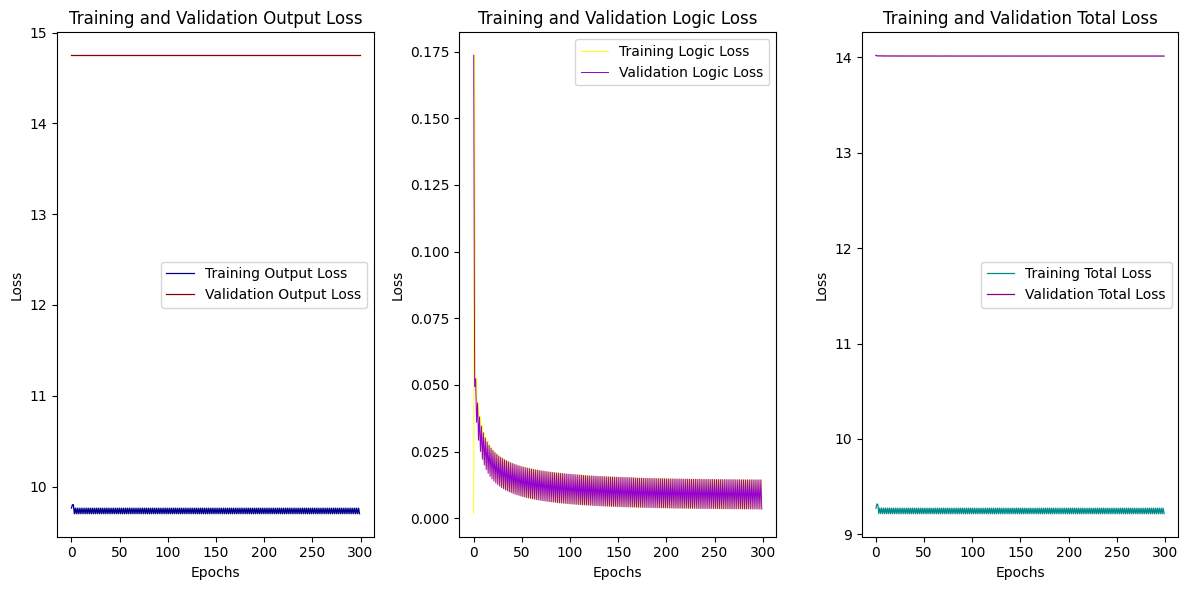

Total training time: 1.5028083324432373 seconds
For combination - learning_rate = 0.01 and epoch = 500 and optimizer = SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 9.2745, Training Accuracy: 0.0000, Validation Loss: 14.0127
For coEpoch number: 50, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 100, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 150, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 200, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125
For coEpoch number: 250, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125
For coEpoch number: 300, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125
For coEp

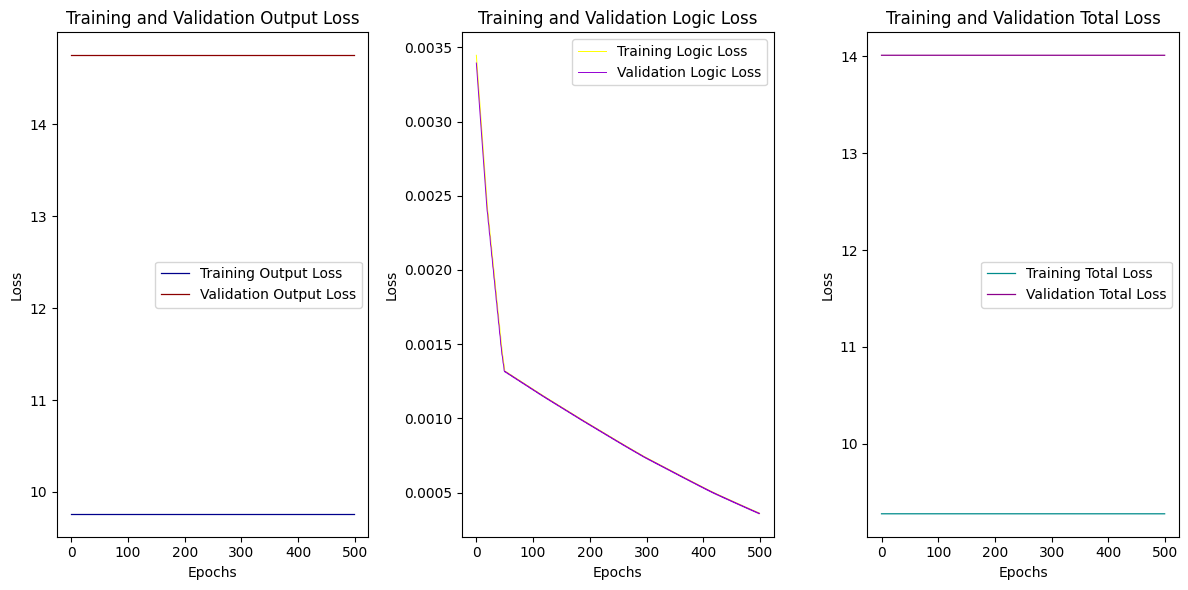

Total training time: 1.1670989990234375 seconds
For combination - learning_rate = 0.01 and epoch = 500 and optimizer = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0134
For coEpoch number: 50, Training Loss: 9.2745, Training Accuracy: 0.0000, Validation Loss: 14.0125
For coEpoch number: 100, Training Loss: 9.2745, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 150, Training Loss: 9.2745, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 200, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 250, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 300, Training Loss: 9.2745, Training Accurac

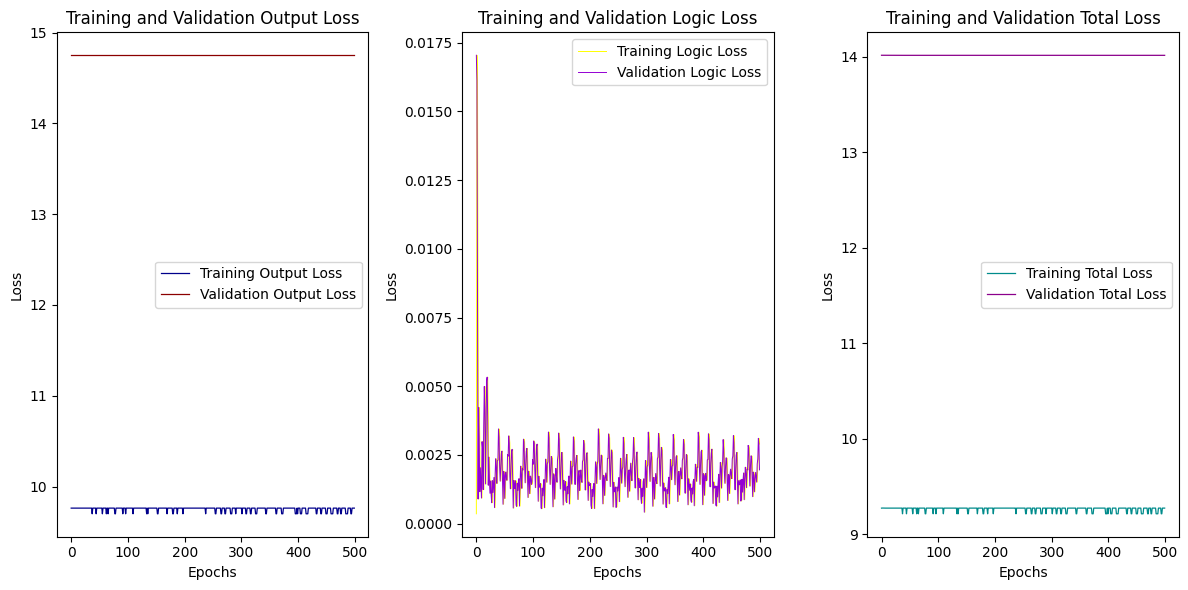

Total training time: 1.9402472972869873 seconds
For combination - learning_rate = 0.01 and epoch = 500 and optimizer = RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 9.2745, Training Accuracy: 0.0000, Validation Loss: 14.0211
For coEpoch number: 50, Training Loss: 9.2748, Training Accuracy: 0.0000, Validation Loss: 14.0135
For coEpoch number: 100, Training Loss: 9.2746, Training Accuracy: 0.0000, Validation Loss: 14.0133
For coEpoch number: 150, Training Loss: 9.2746, Training Accuracy: 0.0000, Validation Loss: 14.0133
For coEpoch number: 200, Training Loss: 9.2746, Training Accuracy: 0.0000, Validation Loss: 14.0133
For coEpoch number: 250, Training Loss: 9.2745, Training Accuracy: 0.0000, Validation Loss: 14.0132
For coEpoch number: 300, Training Loss: 9.2745, Training Accuracy: 0.0000, Validation Loss

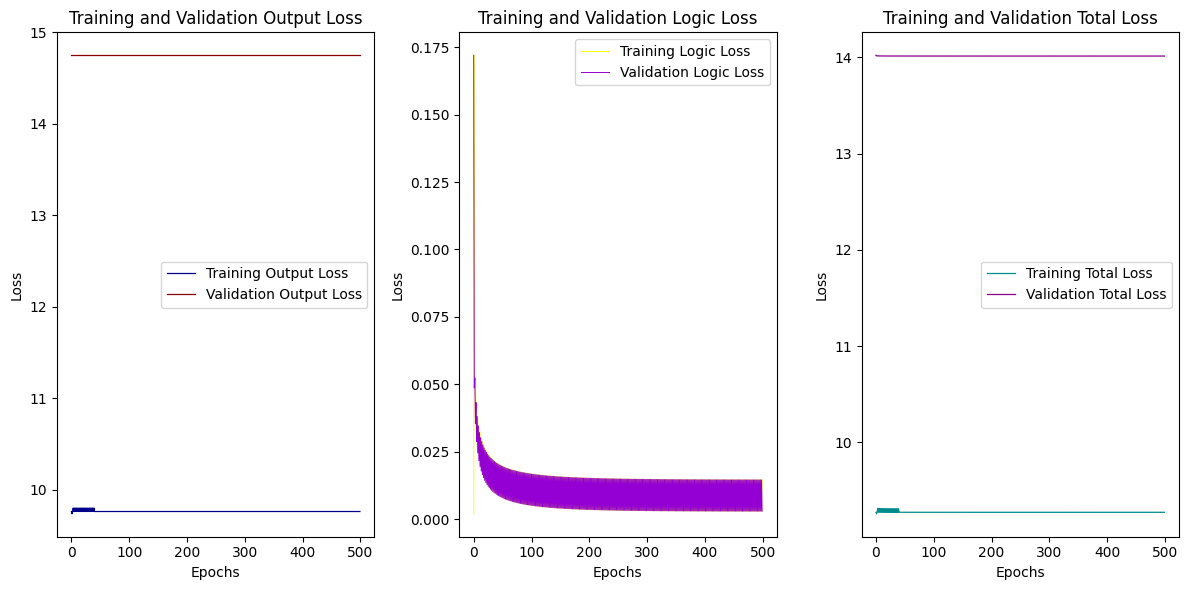

Total training time: 1.3075330257415771 seconds
For combination - learning_rate = 0.001 and epoch = 100 and optimizer = SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 9.2745, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 50, Training Loss: 9.2745, Training Accuracy: 0.0000, Validation Loss: 14.0126


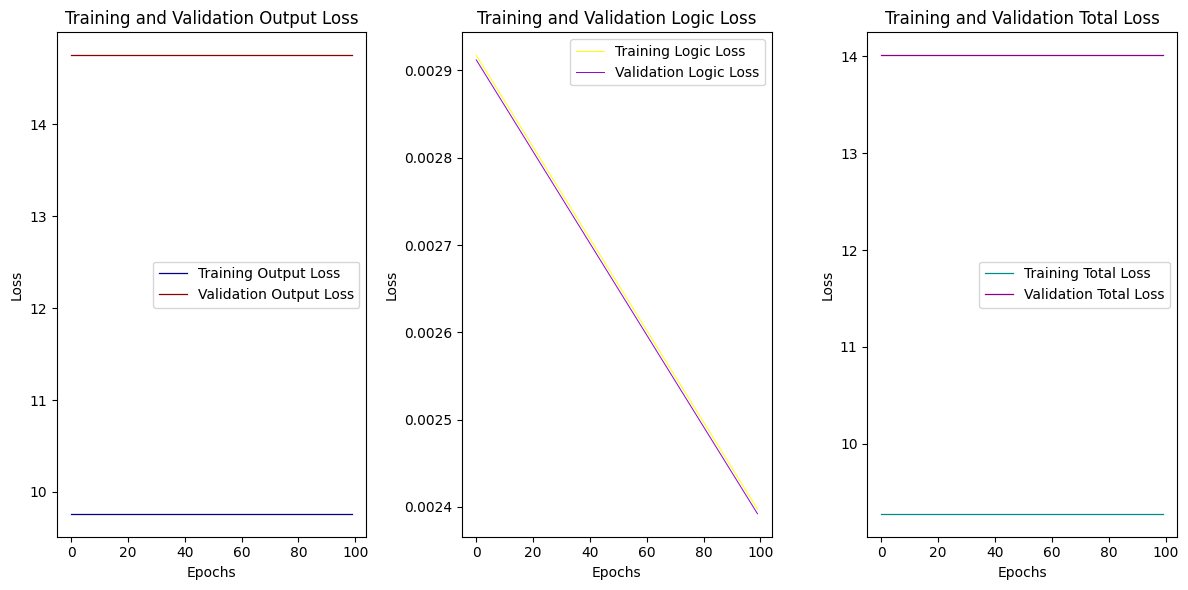

Total training time: 0.2551000118255615 seconds
For combination - learning_rate = 0.001 and epoch = 100 and optimizer = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 9.2745, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 50, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125


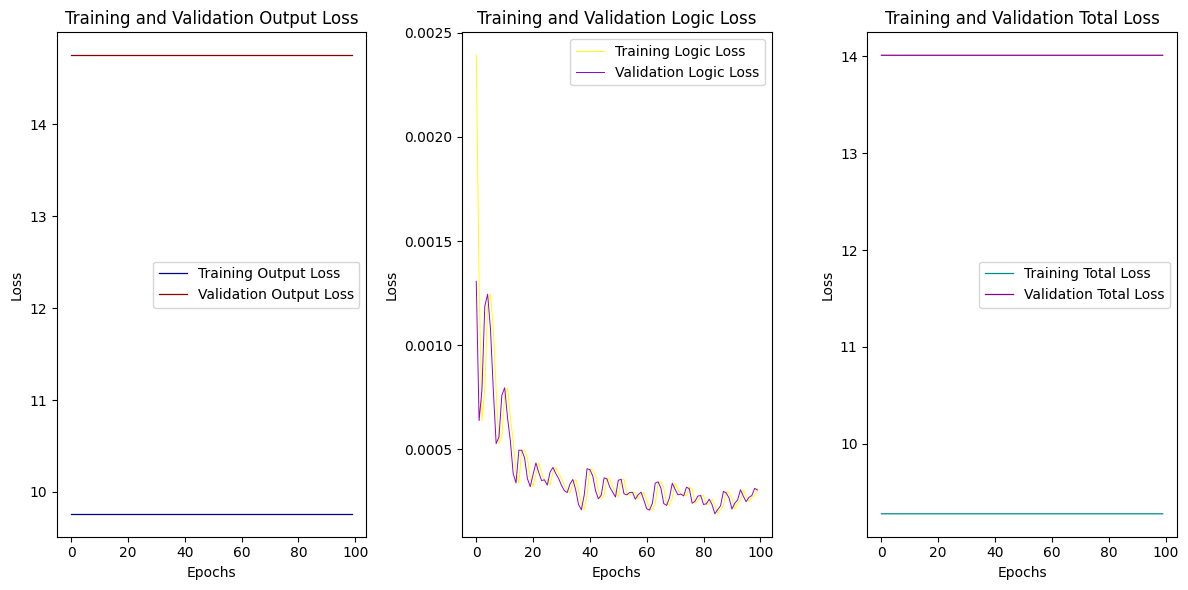

Total training time: 0.3381185531616211 seconds
For combination - learning_rate = 0.001 and epoch = 100 and optimizer = RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0134
For coEpoch number: 50, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0126


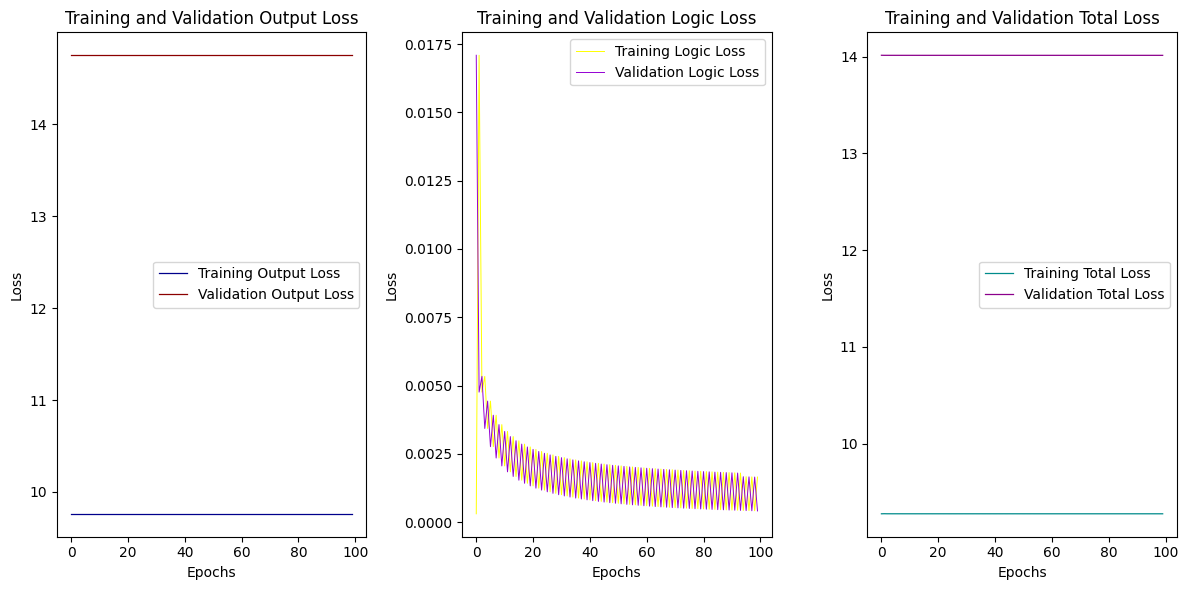

Total training time: 0.28455233573913574 seconds
For combination - learning_rate = 0.001 and epoch = 300 and optimizer = SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125
For coEpoch number: 50, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125
For coEpoch number: 100, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125
For coEpoch number: 150, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125
For coEpoch number: 200, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125
For coEpoch number: 250, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125


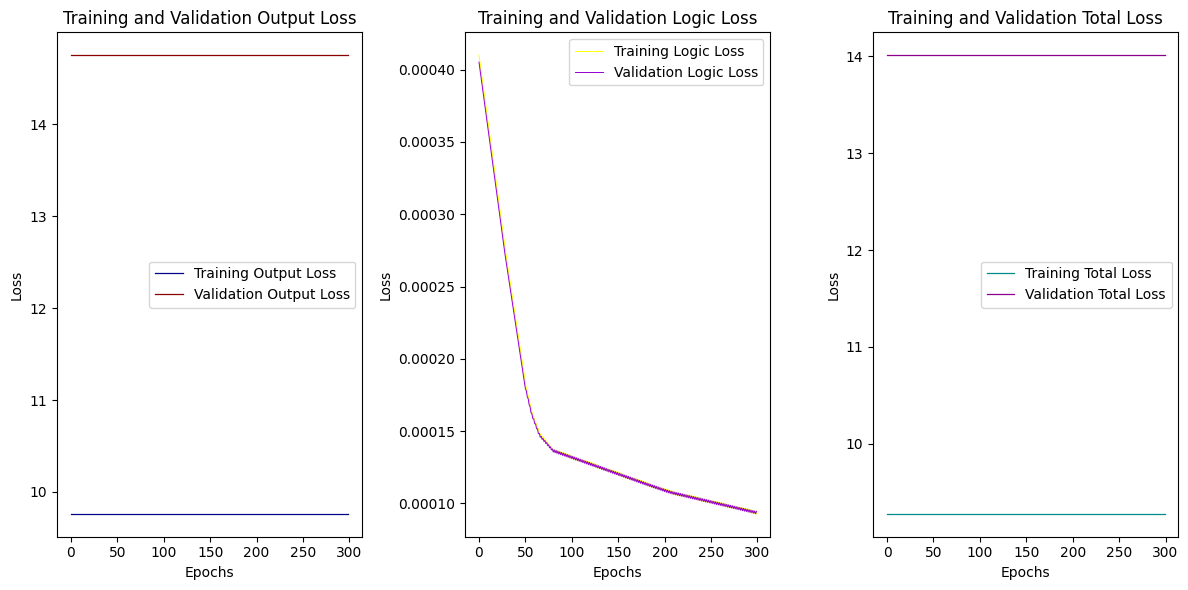

Total training time: 0.7092866897583008 seconds
For combination - learning_rate = 0.001 and epoch = 300 and optimizer = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 50, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125
For coEpoch number: 100, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125
For coEpoch number: 150, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125
For coEpoch number: 200, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125
For coEpoch number: 250, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125


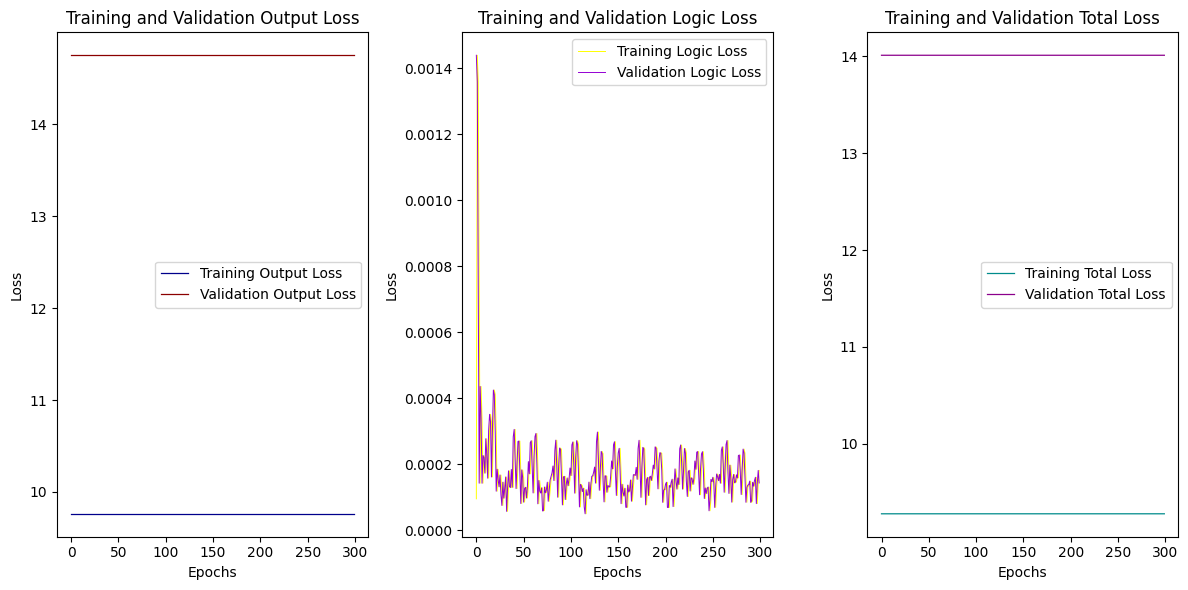

Total training time: 0.8076801300048828 seconds
For combination - learning_rate = 0.001 and epoch = 300 and optimizer = RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0133
For coEpoch number: 50, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 100, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 150, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 200, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 250, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0126


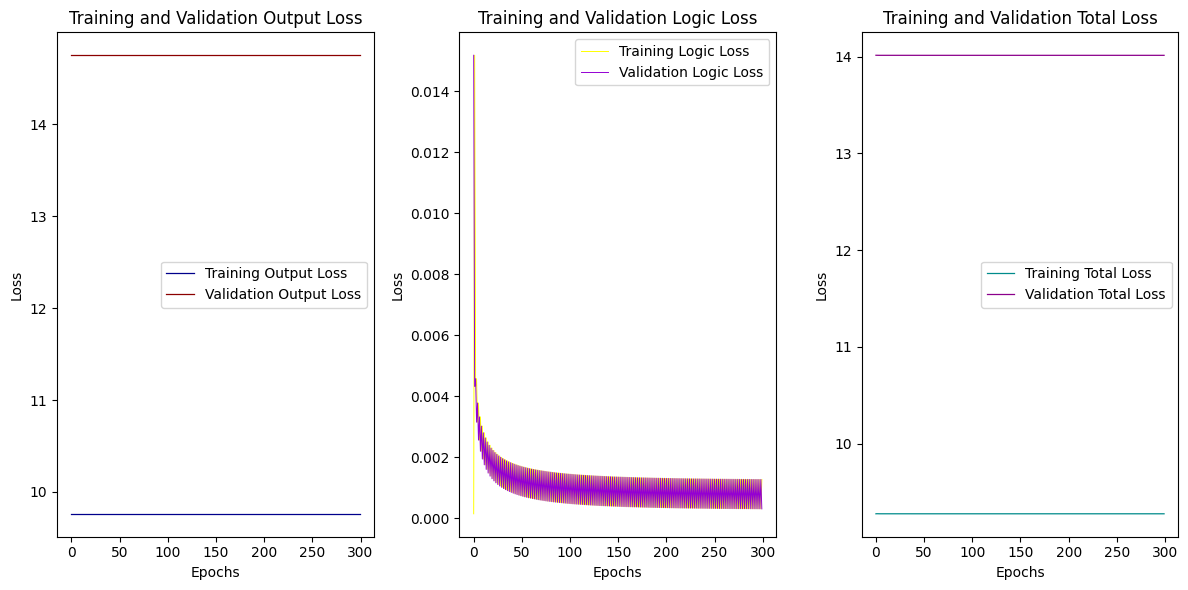

Total training time: 0.7828593254089355 seconds
For combination - learning_rate = 0.001 and epoch = 500 and optimizer = SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125
For coEpoch number: 50, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125
For coEpoch number: 100, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125
For coEpoch number: 150, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125
For coEpoch number: 200, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125
For coEpoch number: 250, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125
For coEpoch number: 300, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125
For co

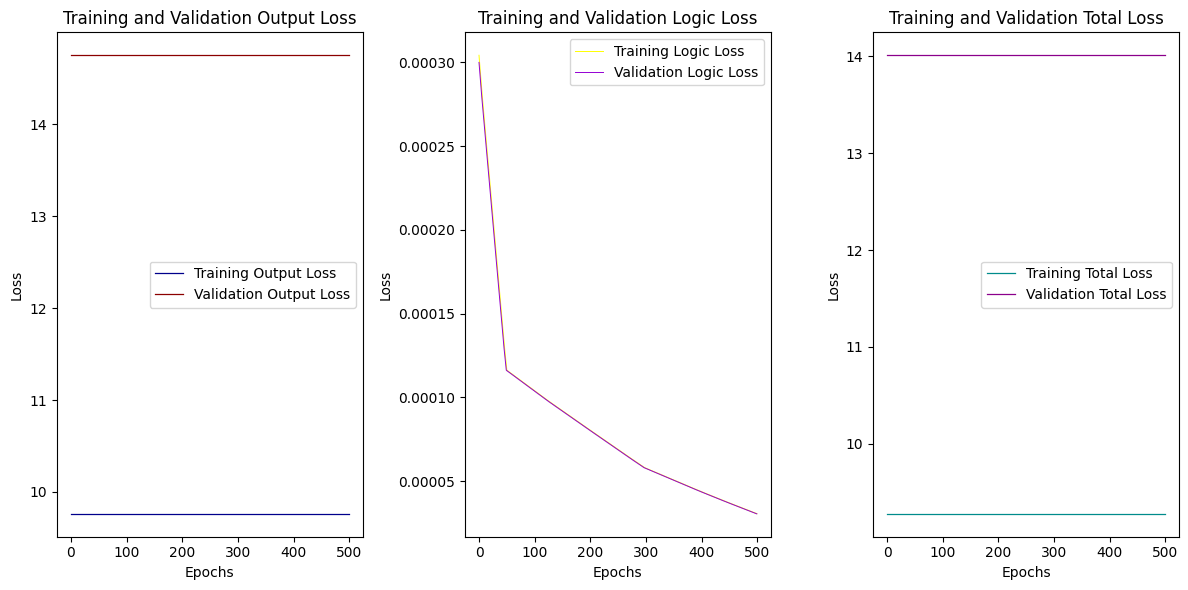

Total training time: 1.6477372646331787 seconds
For combination - learning_rate = 0.001 and epoch = 500 and optimizer = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 50, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125
For coEpoch number: 100, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125
For coEpoch number: 150, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125
For coEpoch number: 200, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125
For coEpoch number: 250, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125
For coEpoch number: 300, Training Loss: 9.2744, Training Accur

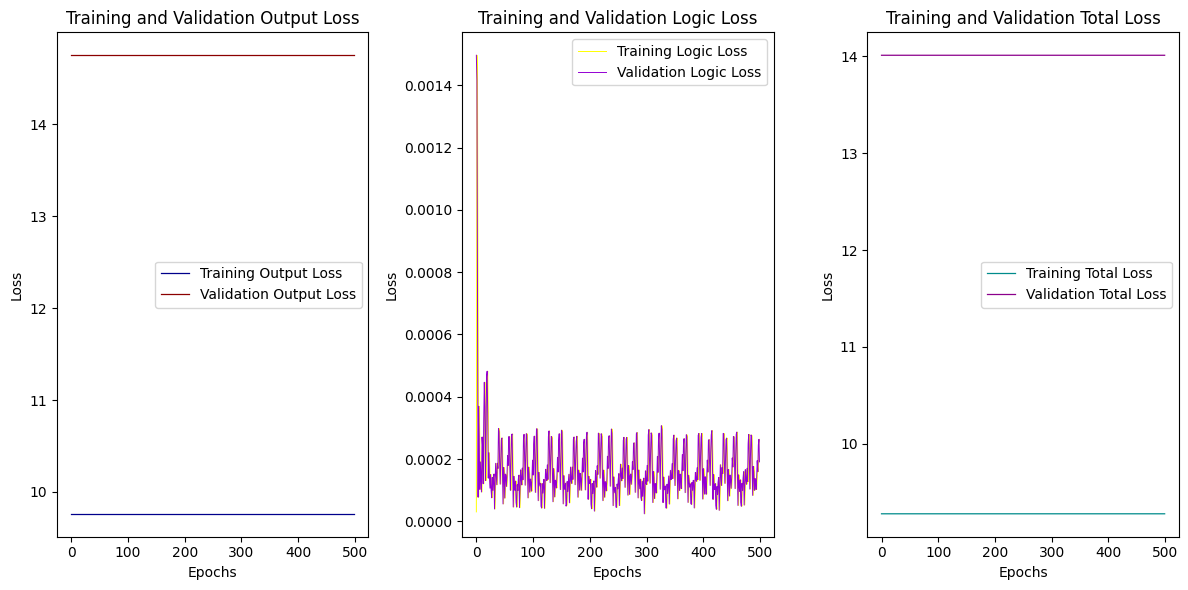

Total training time: 1.4442284107208252 seconds
For combination - learning_rate = 0.001 and epoch = 500 and optimizer = RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0133
For coEpoch number: 50, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 100, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 150, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 200, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 250, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 300, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Lo

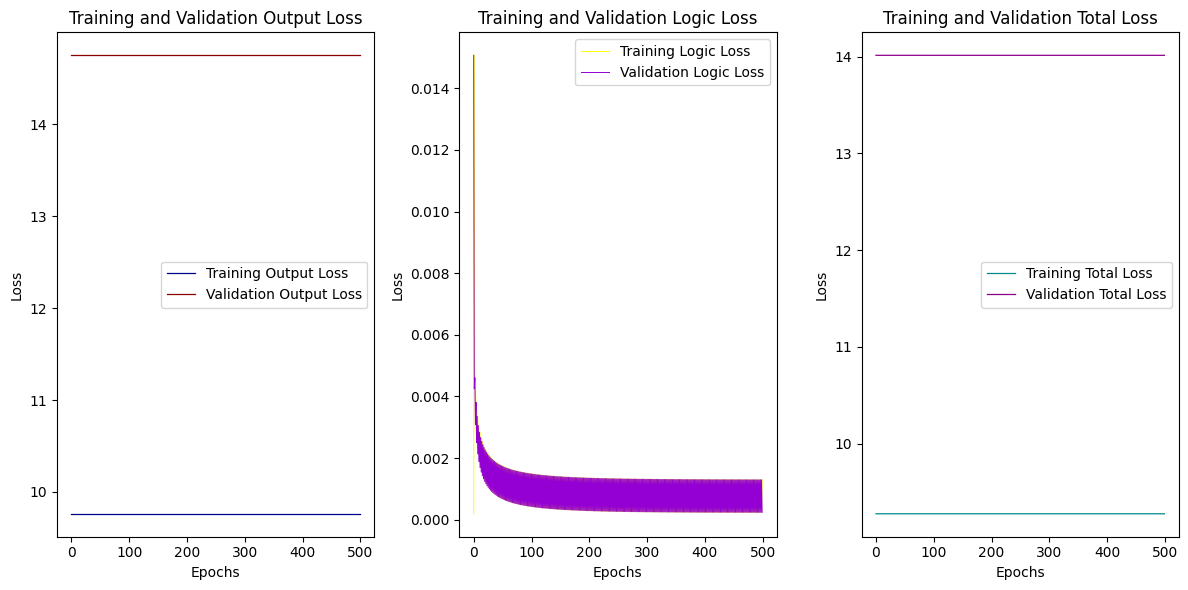

Total training time: 1.2966668605804443 seconds
For combination - learning_rate = 0.1 and epoch = 100 and optimizer = SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125
For coEpoch number: 50, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0125


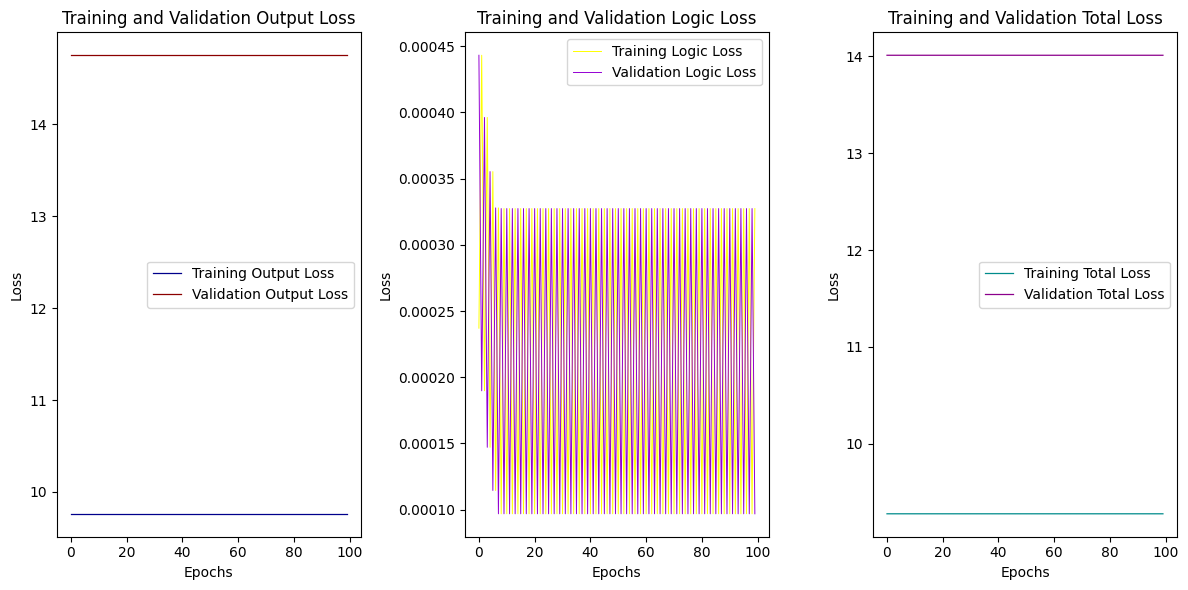

Total training time: 0.2453930377960205 seconds
For combination - learning_rate = 0.1 and epoch = 100 and optimizer = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 9.2744, Training Accuracy: 0.0000, Validation Loss: 14.0201
For coEpoch number: 50, Training Loss: 9.2752, Training Accuracy: 0.0000, Validation Loss: 14.0128


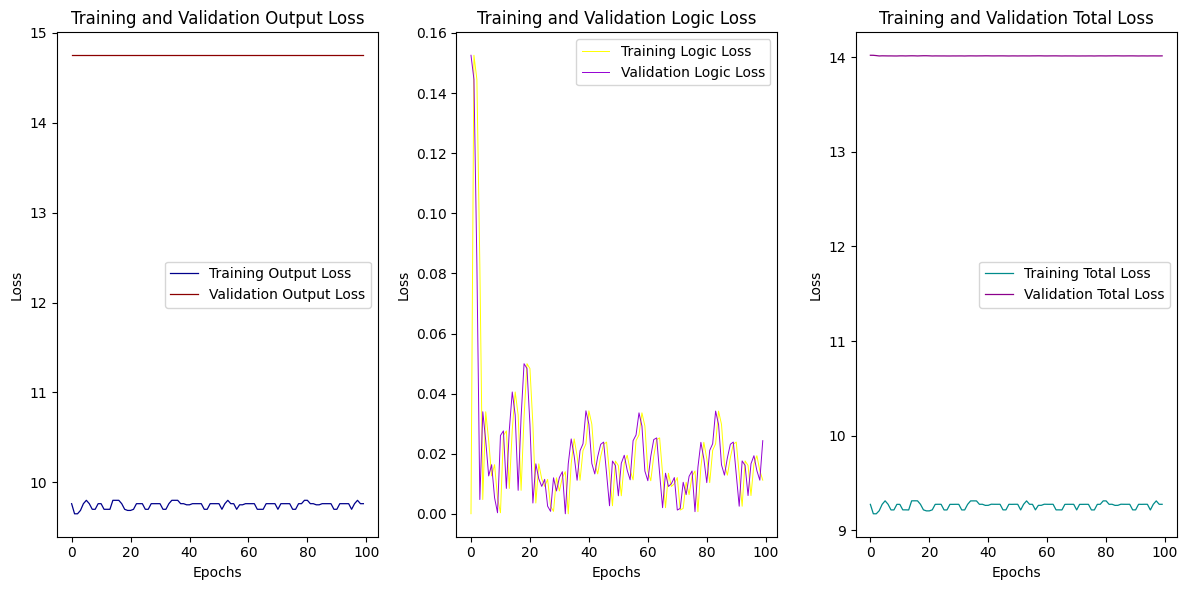

Total training time: 0.29959559440612793 seconds
For combination - learning_rate = 0.1 and epoch = 100 and optimizer = RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 9.2162, Training Accuracy: 0.0000, Validation Loss: 13.5651
For coEpoch number: 50, Training Loss: 9.3131, Training Accuracy: 0.0000, Validation Loss: 14.0214


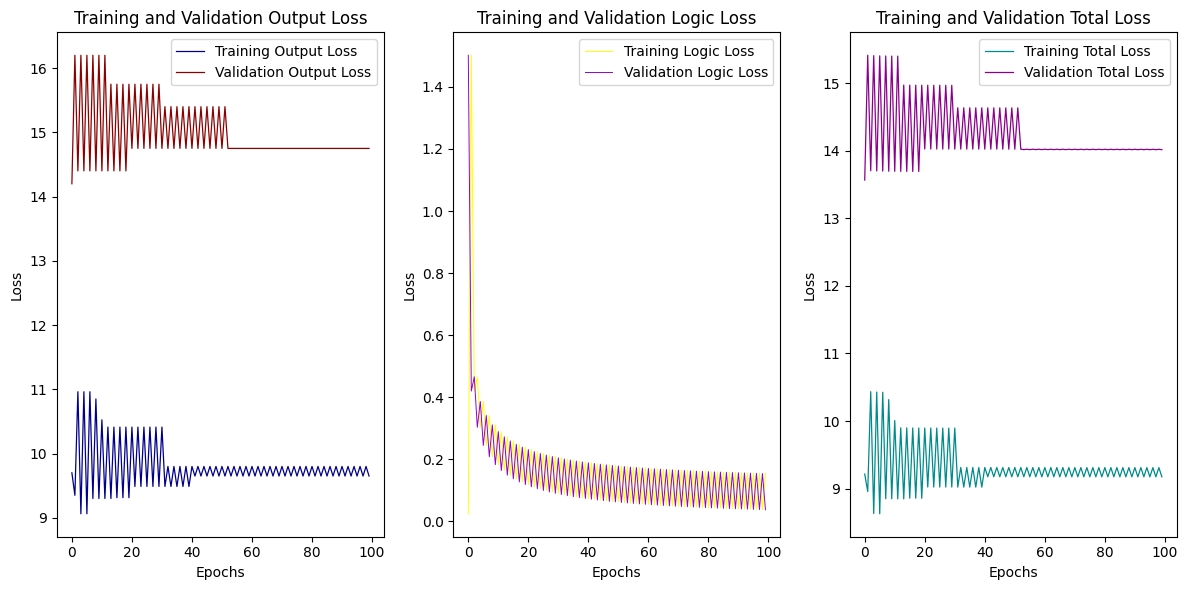

Total training time: 0.25643229484558105 seconds
For combination - learning_rate = 0.1 and epoch = 300 and optimizer = SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 9.3119, Training Accuracy: 0.0000, Validation Loss: 14.0144
For coEpoch number: 50, Training Loss: 9.3108, Training Accuracy: 0.0000, Validation Loss: 14.0133
For coEpoch number: 100, Training Loss: 9.3107, Training Accuracy: 0.0000, Validation Loss: 14.0132
For coEpoch number: 150, Training Loss: 9.2750, Training Accuracy: 0.0000, Validation Loss: 14.0131
For coEpoch number: 200, Training Loss: 9.2749, Training Accuracy: 0.0000, Validation Loss: 14.0131
For coEpoch number: 250, Training Loss: 9.2749, Training Accuracy: 0.0000, Validation Loss: 14.0130


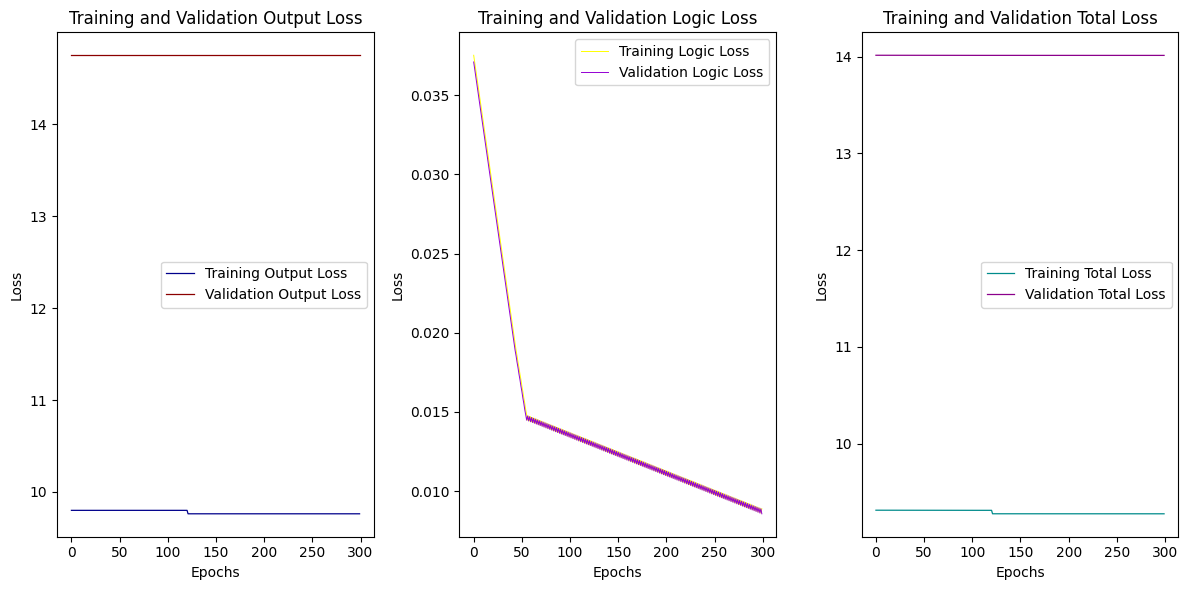

Total training time: 0.7200853824615479 seconds
For combination - learning_rate = 0.1 and epoch = 300 and optimizer = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 9.2748, Training Accuracy: 0.0000, Validation Loss: 14.0197
For coEpoch number: 50, Training Loss: 9.2752, Training Accuracy: 0.0000, Validation Loss: 14.0126
For coEpoch number: 100, Training Loss: 9.2757, Training Accuracy: 0.0000, Validation Loss: 14.0146
For coEpoch number: 150, Training Loss: 9.2157, Training Accuracy: 0.0000, Validation Loss: 14.0128
For coEpoch number: 200, Training Loss: 9.2748, Training Accuracy: 0.0000, Validation Loss: 14.0130
For coEpoch number: 250, Training Loss: 9.2747, Training Accuracy: 0.0000, Validation Loss: 14.0131


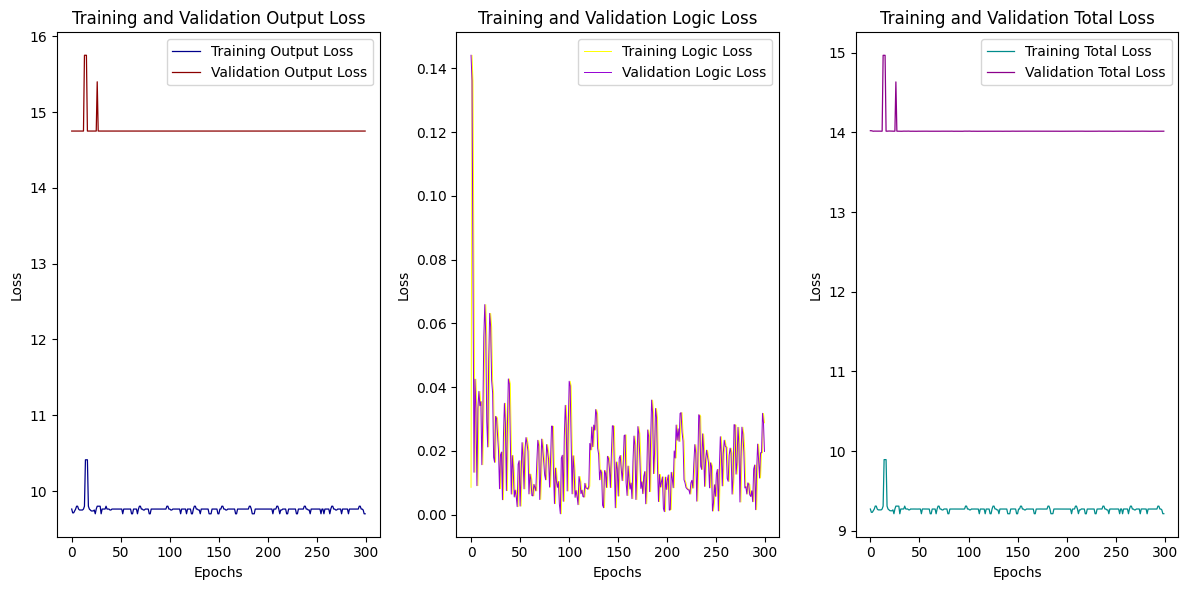

Total training time: 0.9647355079650879 seconds
For combination - learning_rate = 0.1 and epoch = 300 and optimizer = RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 9.2754, Training Accuracy: 0.0000, Validation Loss: 11.4278
For coEpoch number: 50, Training Loss: 9.2540, Training Accuracy: 0.0250, Validation Loss: 14.9712
For coEpoch number: 100, Training Loss: 9.2646, Training Accuracy: 0.0125, Validation Loss: 14.9700
For coEpoch number: 150, Training Loss: 9.2641, Training Accuracy: 0.0125, Validation Loss: 14.9695
For coEpoch number: 200, Training Loss: 9.2639, Training Accuracy: 0.0125, Validation Loss: 14.9693
For coEpoch number: 250, Training Loss: 9.2638, Training Accuracy: 0.0125, Validation Loss: 14.9692


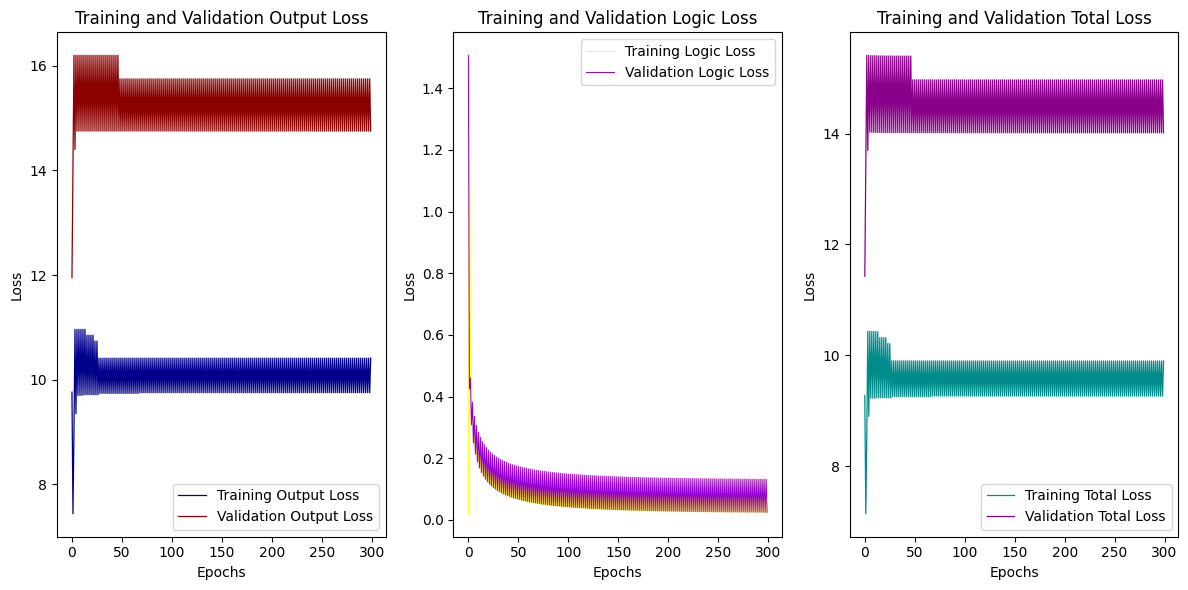

Total training time: 1.0602166652679443 seconds
For combination - learning_rate = 0.1 and epoch = 500 and optimizer = SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 9.2637, Training Accuracy: 0.0125, Validation Loss: 14.0137
For coEpoch number: 50, Training Loss: 9.2751, Training Accuracy: 0.0000, Validation Loss: 14.0133
For coEpoch number: 100, Training Loss: 9.2751, Training Accuracy: 0.0000, Validation Loss: 14.0132
For coEpoch number: 150, Training Loss: 9.2750, Training Accuracy: 0.0000, Validation Loss: 14.0132
For coEpoch number: 200, Training Loss: 9.2750, Training Accuracy: 0.0000, Validation Loss: 14.0131
For coEpoch number: 250, Training Loss: 9.2749, Training Accuracy: 0.0000, Validation Loss: 14.0130
For coEpoch number: 300, Training Loss: 9.2748, Training Accuracy: 0.0000, Validation Loss: 14.0130
For coEpoc

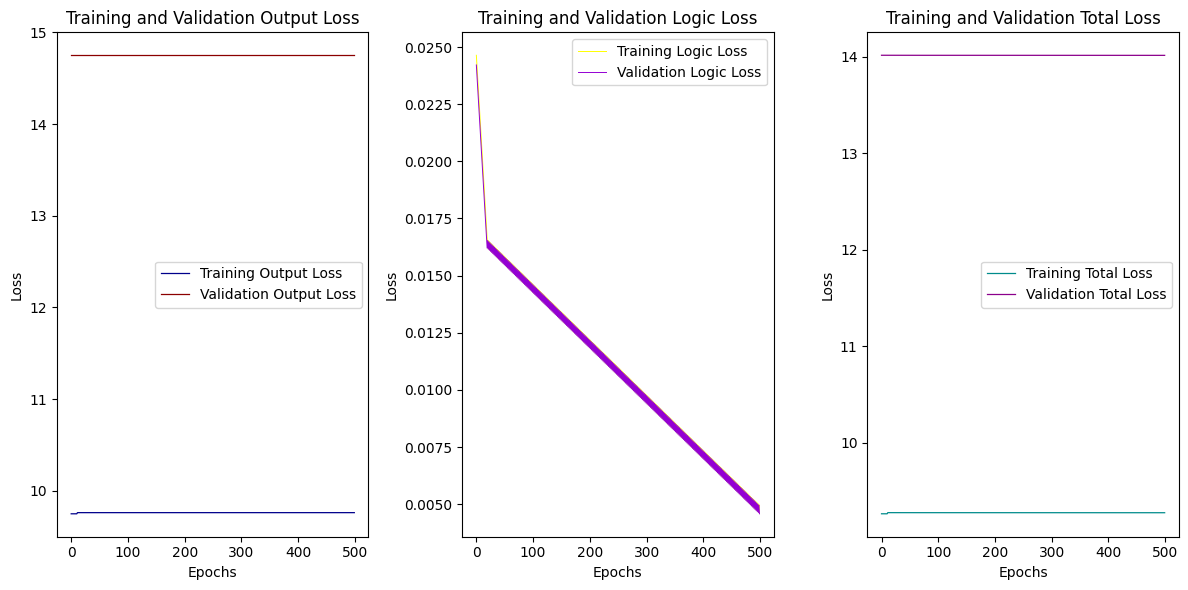

Total training time: 1.2304964065551758 seconds
For combination - learning_rate = 0.1 and epoch = 500 and optimizer = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 9.2746, Training Accuracy: 0.0000, Validation Loss: 14.9699
For coEpoch number: 50, Training Loss: 9.2751, Training Accuracy: 0.0000, Validation Loss: 14.0129
For coEpoch number: 100, Training Loss: 9.2758, Training Accuracy: 0.0000, Validation Loss: 14.0139
For coEpoch number: 150, Training Loss: 9.2747, Training Accuracy: 0.0000, Validation Loss: 14.0130
For coEpoch number: 200, Training Loss: 9.2752, Training Accuracy: 0.0000, Validation Loss: 14.0137
For coEpoch number: 250, Training Loss: 9.2748, Training Accuracy: 0.0000, Validation Loss: 14.0129
For coEpoch number: 300, Training Loss: 9.2756, Training Accuracy:

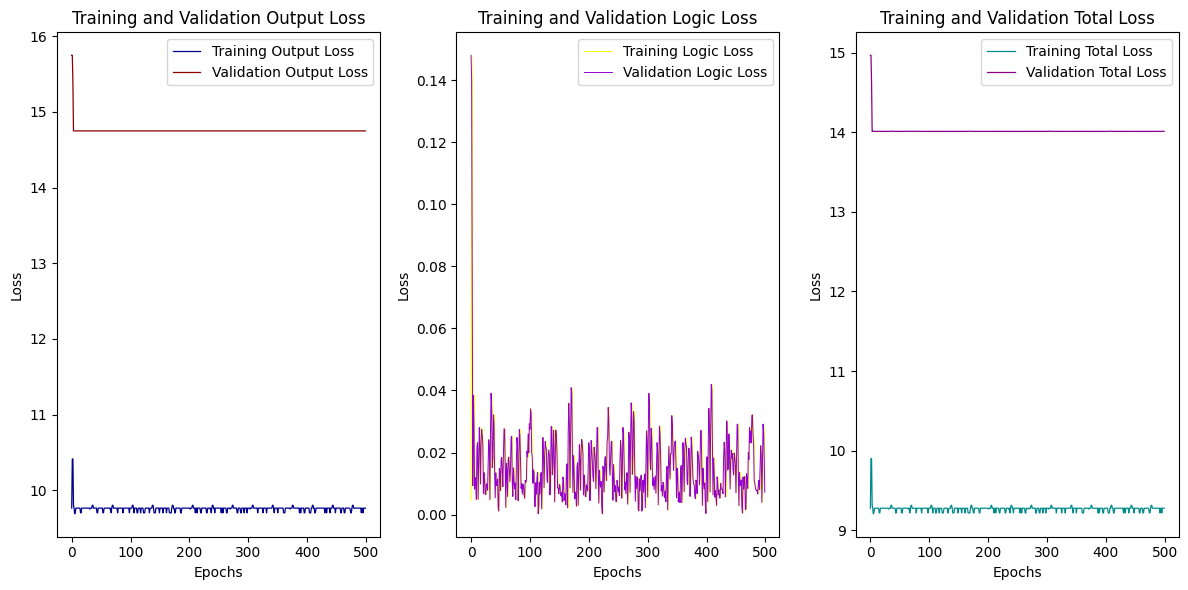

Total training time: 1.3997526168823242 seconds
For combination - learning_rate = 0.1 and epoch = 500 and optimizer = RMSprop (
Parameter Group 0
    alpha: 0.99
    centered: False
    differentiable: False
    eps: 1e-08
    foreach: None
    lr: 0.1
    maximize: False
    momentum: 0
    weight_decay: 0
)
For coEpoch number: 0, Training Loss: 9.2747, Training Accuracy: 0.0000, Validation Loss: 11.4285
For coEpoch number: 50, Training Loss: 9.2546, Training Accuracy: 0.0250, Validation Loss: 14.9706
For coEpoch number: 100, Training Loss: 9.2652, Training Accuracy: 0.0125, Validation Loss: 14.9693
For coEpoch number: 150, Training Loss: 9.2648, Training Accuracy: 0.0125, Validation Loss: 14.9689
For coEpoch number: 200, Training Loss: 9.2646, Training Accuracy: 0.0125, Validation Loss: 14.9686
For coEpoch number: 250, Training Loss: 9.2644, Training Accuracy: 0.0125, Validation Loss: 14.9685
For coEpoch number: 300, Training Loss: 9.2644, Training Accuracy: 0.0125, Validation Loss: 

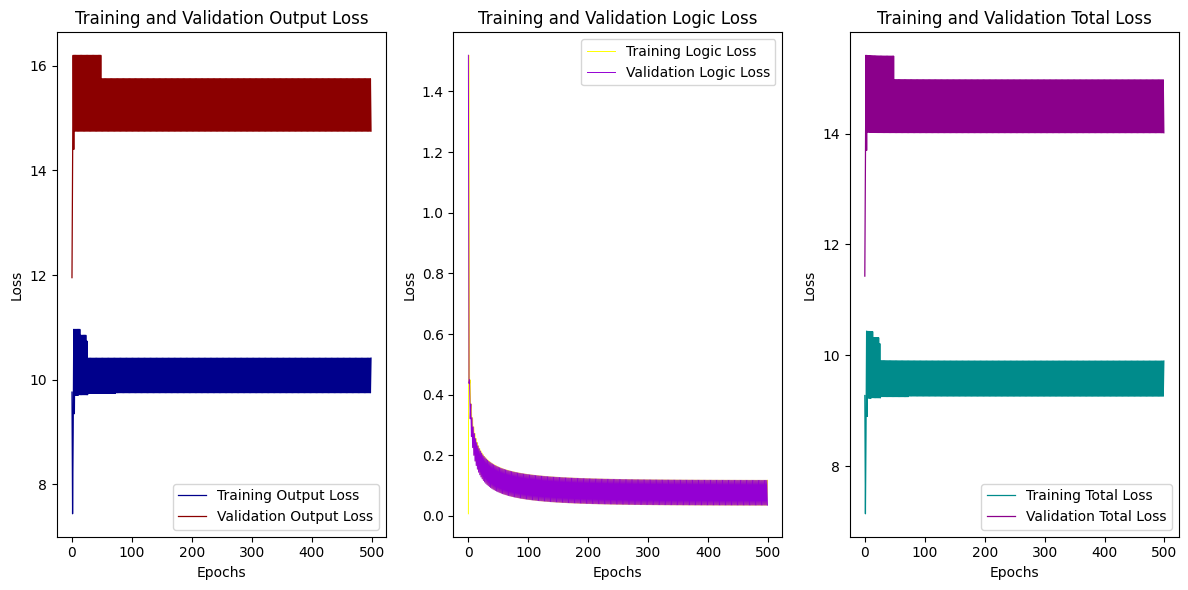

Total training time: 1.3294267654418945 seconds


In [ ]:
from itertools import product
learning_rates = [0.01,0.001,0.1]
num_epochs = [100,300,500]
optimizers = ['sgd', 'adam', 'rmsprop']
hyperparameter_combinations = list(product(learning_rates, num_epochs, optimizers))
for lr, num_epochs,optimizer in hyperparameter_combinations:
    if optimizer == 'sgd':
        optimizer = optim.SGD(net.parameters(), lr=lr)
    elif optimizer == 'adam':
        optimizer = optim.Adam(net.parameters(), lr=lr)
    elif optimizer == 'rmsprop':
        optimizer = optim.RMSprop(net.parameters(), lr=lr)
    print(f"For combination - learning_rate = {lr} and epoch = {num_epochs} and optimizer = {optimizer}")

    # Initialising lists to store losses
    train_output_loss_list = []
    train_logic_loss_list = []
    train_total_loss_list = []
    train_accuracy_list = []

    validation_output_loss_list = []
    validation_logic_loss_list = []
    validation_total_loss_list = []

    alpha = 0.05
    beta = (1-alpha)

    start_time = time.time()

    net.train()  # Setting the model to training mode

    for i in range(num_epochs):

        # Training phase
        optimizer.zero_grad()
        predicted_output_train = net.forward(train_features)

        predicted_output_train = torch.mean(predicted_output_train, dim=1)
        predicted_output_train= torch.round(predicted_output_train)

        output_loss_train = output_loss_metric(predicted_output_train, train_labels)

        logic_loss_train = (
            logic_loss_metric(net.fc1.weight, weight_mat_final) +
            logic_loss_metric(net.fc1.bias, bias_mat_final)
        )

        total_loss_train = beta * output_loss_train + alpha * logic_loss_train
        predicted_labels_train_np = np.round(predicted_output_train.detach().numpy())
        train_labels_np = train_labels.numpy()
        correct_count = np.sum(predicted_labels_train_np == train_labels_np)
        total_count = np.prod(train_labels_np.shape)
        accuracy_train = accuracy_score(train_labels_np,predicted_labels_train_np)

        # Backward pass and optimization for training data
        total_loss_train.backward()
        optimizer.step()

        # Storing training losses
        train_output_loss_list.append(output_loss_train.item())
        train_logic_loss_list.append(logic_loss_train.item())
        train_total_loss_list.append(total_loss_train.item())
        train_accuracy_list.append(accuracy_train)

        # Setting the model to evaluation mode
        net.eval()

        with torch.no_grad():
            predicted_output_val = net.forward(validation_features)
            predicted_output_val = torch.mean(predicted_output_val, dim=1)
            predicted_output_val= torch.round(predicted_output_val)
            output_loss_val = output_loss_metric(predicted_output_val, validation_labels)
            logic_loss_val = (
                logic_loss_metric(net.fc1.weight, weight_mat_final) +
                logic_loss_metric(net.fc1.bias, bias_mat_final)
            )

            total_loss_val = beta * output_loss_val + alpha * logic_loss_val
            validation_output_loss_list.append(output_loss_val.item())
            validation_logic_loss_list.append(logic_loss_val.item())
            validation_total_loss_list.append(total_loss_val.item())
            if(i%50 == 0):
                print("For coEpoch number: {}, Training Loss: {:.4f}, Training Accuracy: {:.4f}, Validation Loss: {:.4f}".format( i, total_loss_train.item(), accuracy_train, total_loss_val.item(),i))

    # Recording the end time
    end_time = time.time()
    plot_metrics(num_epochs,train_output_loss_list,train_logic_loss_list,train_total_loss_list,
                 validation_output_loss_list,validation_logic_loss_list,validation_total_loss_list)
    # Calculating the elapsed time
    elapsed_time = end_time - start_time
    print(f"Total training time: {elapsed_time} seconds")


In [ ]:
# Above logic loss function inspriration taken by
# Rajasegaram, D. (2023). Enhancing Neural Networks with Prior Knowledge. MSc in Data Science, [City University of London] paper and also mentioned in my dissertation report.
